# Audio Classification : Data Preprocessing

In [1]:
import librosa
audio_file_path = r"C:\Users\sindh\OneDrive\Documents\Projects\Audio Classification\UrbanSound8K\audio\fold4\7064-6-1-0.wav"
librosa_audio_data, librosa_sample_rate = librosa.load(audio_file_path)

In [2]:
print(librosa_audio_data)

[0.0028339  0.00257723 0.00425194 ... 0.0087251  0.01050946 0.00926754]


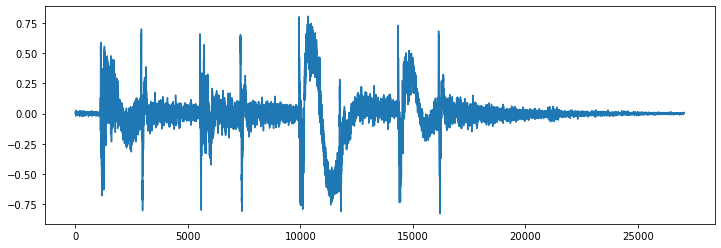

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 4))
plt.plot(librosa_audio_data)

# Observation

Here librosa converts the signal to mono, meaning the channel will always be 1

In [4]:
### lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [5]:
wave_audio

array([[ 340,  -71],
       [ 428, -232],
       [ 476, -352],
       ...,
       [ 407,  301],
       [ 344,  219],
       [ 297,  165]], dtype=int16)

This particular wave_audio is in 2-dimensional which is scipy wheras librosa is 1-dimensional

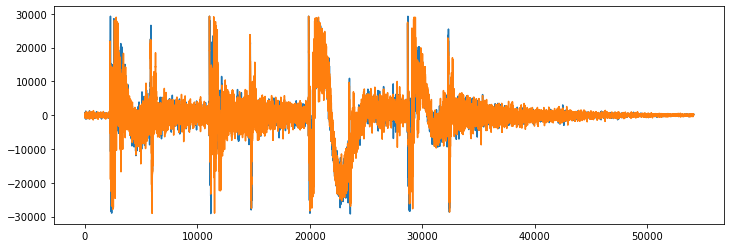

In [6]:
import matplotlib.pyplot as plt

# original audio with 2 channels
plt.figure(figsize = (12, 4))
plt.plot(wave_audio)

# Extract Features

Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples.The MFCC summarizes 
the frequency distribution across the window-size, so it is possible to analyse both the frequency 
and time characteristics of the sound. These audio representations will allow us to identify 
features for classification

In [7]:
mfccs = librosa.feature.mfcc(y = librosa_audio_data, sr = librosa_sample_rate, n_mfcc = 40)
mfccs.shape

(40, 53)

In [8]:
mfccs

array([[-2.9554556e+02, -1.3783302e+02, -6.4759678e-01, ...,
        -3.3963348e+02, -3.5253217e+02, -3.6157382e+02],
       [ 7.7354424e+01,  5.7221840e+01,  4.8992958e+01, ...,
         9.2686111e+01,  9.5005501e+01,  9.9756454e+01],
       [-2.9432957e+01,  2.7955891e+01,  2.7583099e+01, ...,
        -3.0009283e+01, -3.0063675e+01, -1.8402206e+01],
       ...,
       [-2.1983972e+00,  1.9508240e-01, -1.2937995e+00, ...,
        -8.8997483e-02,  7.0049667e-01, -1.4640166e-01],
       [-1.8026142e+00,  2.4518895e+00,  1.5628548e+00, ...,
         2.5469561e+00,  2.6217051e+00,  3.7565575e+00],
       [-8.6644101e-01,  5.4332056e+00,  8.0242167e+00, ...,
         1.8910456e-01,  3.8091648e-01,  2.0200272e+00]], dtype=float32)

In [9]:
# Extracting MFCC's for every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [10]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features


In [11]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [04:28, 14.33it/s]C:\Users\sindh\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
8325it [22:22, 14.33it/s] C:\Users\sindh\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
C:\Users\sindh\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
8732it [23:03,  6.31it/s]


In [12]:
extracted_features_df = pd.DataFrame(extracted_features, columns = ["feature", "class"])
extracted_features_df

,feature,class
0,"[-218.18938, 71.38549, -131.49442, -52.25892, ...",dog_bark
1,"[-425.05234, 110.67095, -54.192833, 62.045406,...",children_playing
2,"[-459.82623, 122.82864, -47.908062, 53.302677,...",children_playing
3,"[-414.82184, 102.94826, -36.656853, 54.170742,...",children_playing
4,"[-447.60776, 115.08627, -53.74607, 61.55309, 1...",children_playing
...,...,...
8727,"[-399.52393, 136.84413, -51.977036, 37.014854,...",car_horn
8728,"[-347.32773, 87.53586, -46.2994, 52.748062, -3...",car_horn
8729,"[-304.84702, 112.69567, -47.21992, 37.061134, ...",car_horn
8730,"[-345.06885, 126.78658, -56.18254, 36.07703, -...",car_horn


In [13]:
x = np.array(extracted_features_df["feature"].tolist())
y = np.array(extracted_features_df["class"].tolist())

In [14]:
x.shape

(8732, 40)

In [15]:
y.shape

(8732,)

In [16]:
y = np.array(pd.get_dummies(y))

In [17]:
y.shape

(8732, 10)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [19]:
x_train.shape

(6985, 40)

In [20]:
x_test.shape

(1747, 40)

In [21]:
y_train.shape

(6985, 10)

In [22]:
y_test.shape

(1747, 10)

In [23]:
x_train

array([[-1.3211458e+02,  1.1391494e+02, -2.3927406e+01, ...,
         3.3260243e+00, -1.4790288e+00,  2.8912871e+00],
       [-1.4296137e+01,  9.1951004e+01, -8.6025953e+00, ...,
        -3.3708370e+00, -5.2008624e+00, -1.5975088e+00],
       [-4.9827820e+01,  1.8449357e-01, -2.0364500e+01, ...,
         2.0259936e+00, -8.3159238e-01,  2.7930872e+00],
       ...,
       [-4.2723694e+02,  9.2938095e+01,  2.8287885e+00, ...,
         8.1411356e-01,  6.6066748e-01,  7.8365982e-01],
       [-1.4640692e+02,  1.3716916e+02, -3.4362492e+01, ...,
         1.3839475e+00, -1.9667517e+00, -8.8792092e-01],
       [-4.2171307e+02,  2.1160454e+02,  2.5852380e+00, ...,
        -5.1338639e+00, -3.6135261e+00, -1.3413876e+00]], dtype=float32)

# Model Creation

In [24]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [26]:
num_labels = y.shape[1]

In [27]:
model = Sequential()

### first layer
model.add(Dense(100, input_shape = (40, )))
model.add(Activation("relu"))
model.add(Dropout(0.5))

### Second layer
model.add(Dense(100, input_shape = (40, )))
model.add(Activation("relu"))
model.add(Dropout(0.5))

### third layer
model.add(Dense(100, input_shape = (40, )))
model.add(Activation("relu"))
model.add(Dropout(0.5))

### final layer
model.add(Dense(num_labels))
model.add(Activation("softmax"))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 activation_1 (Activation)   (None, 100)               0         
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               1

In [29]:
model.compile(loss = "categorical_crossentropy", metrics = ["accuracy"], optimizer = "adam")

In [30]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
219/219 [==============================] - ETA: 0s - loss: 11.1338 - accuracy: 0.1247
Epoch 1: val_loss improved from inf to 2.23889, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 3s 7ms/step - loss: 11.1338 - accuracy: 0.1247 - val_loss: 2.2389 - val_accuracy: 0.1752
Epoch 2/100
205/219 [===========================>..] - ETA: 0s - loss: 2.9341 - accuracy: 0.1241
Epoch 2: val_loss did not improve from 2.23889
219/219 [==============================] - 1s 4ms/step - loss: 2.9035 - accuracy: 0.1253 - val_loss: 2.2565 - val_accuracy: 0.1282
Epoch 3/100
206/219 [===========================>..] - ETA: 0s - loss: 2.4317 - accuracy: 0.1267
Epoch 3: val_loss improved from 2.23889 to 2.23836, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 2.4241 - accuracy: 0.1274 - val_loss: 2.2384 - val_accuracy: 0.1351
Epoch 4/100
217/219 [============================>.] - ET

Epoch 26/100
214/219 [============================>.] - ETA: 0s - loss: 1.4003 - accuracy: 0.5272
Epoch 26: val_loss improved from 1.21284 to 1.18971, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 1.3994 - accuracy: 0.5256 - val_loss: 1.1897 - val_accuracy: 0.6239
Epoch 27/100
209/219 [===========================>..] - ETA: 0s - loss: 1.4038 - accuracy: 0.5298
Epoch 27: val_loss did not improve from 1.18971
219/219 [==============================] - 1s 4ms/step - loss: 1.3986 - accuracy: 0.5313 - val_loss: 1.1965 - val_accuracy: 0.6176
Epoch 28/100
214/219 [============================>.] - ETA: 0s - loss: 1.3585 - accuracy: 0.5365
Epoch 28: val_loss improved from 1.18971 to 1.15006, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 1.3606 - accuracy: 0.5363 - val_loss: 1.1501 - val_accuracy: 0.6314
Epoch 29/100
212/219 [===========================

Epoch 53/100
215/219 [============================>.] - ETA: 0s - loss: 1.1582 - accuracy: 0.6177
Epoch 53: val_loss improved from 0.94748 to 0.94274, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 1.1574 - accuracy: 0.6176 - val_loss: 0.9427 - val_accuracy: 0.6938
Epoch 54/100
208/219 [===========================>..] - ETA: 0s - loss: 1.1412 - accuracy: 0.6252
Epoch 54: val_loss improved from 0.94274 to 0.94106, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 1.1375 - accuracy: 0.6262 - val_loss: 0.9411 - val_accuracy: 0.6995
Epoch 55/100
214/219 [============================>.] - ETA: 0s - loss: 1.0931 - accuracy: 0.6294
Epoch 55: val_loss improved from 0.94106 to 0.91372, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 1.0945 - accuracy: 0.6289 - val_loss: 0.9137 - val_accura

219/219 [==============================] - 1s 4ms/step - loss: 1.0253 - accuracy: 0.6535 - val_loss: 0.8212 - val_accuracy: 0.7304
Epoch 81/100
215/219 [============================>.] - ETA: 0s - loss: 1.0463 - accuracy: 0.6515
Epoch 81: val_loss did not improve from 0.82123
219/219 [==============================] - 1s 4ms/step - loss: 1.0472 - accuracy: 0.6514 - val_loss: 0.8410 - val_accuracy: 0.7235
Epoch 82/100
213/219 [============================>.] - ETA: 0s - loss: 1.0288 - accuracy: 0.6630
Epoch 82: val_loss did not improve from 0.82123
219/219 [==============================] - 1s 4ms/step - loss: 1.0285 - accuracy: 0.6630 - val_loss: 0.8484 - val_accuracy: 0.7189
Epoch 83/100
211/219 [===========================>..] - ETA: 0s - loss: 1.0418 - accuracy: 0.6555
Epoch 83: val_loss did not improve from 0.82123
219/219 [==============================] - 1s 4ms/step - loss: 1.0455 - accuracy: 0.6540 - val_loss: 0.8320 - val_accuracy: 0.7293
Epoch 84/100
201/219 [================

In [31]:
test_accuracy=model.evaluate(x_test,y_test,verbose=0)
print(test_accuracy[1])

0.7355466485023499


In [32]:
filename="UrbanSound8K/dog_bark.wav"
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
model.predict(prediction_feature)

1/1 [==============================] - 0s 181ms/step


array([[1.3070515e-05, 6.1804283e-01, 2.2151219e-03, 1.2003188e-02,
        7.8810183e-03, 1.5084750e-03, 1.8496891e-04, 5.6915462e-04,
        6.5570325e-04, 3.5692650e-01]], dtype=float32)

 # Testing Some Test Audio Data
 
 steps
 
- Preprocess the new audio data
- predict the classes
- Invere transform your Predicted Label

In [33]:
filename = "C:\Users\sindh\OneDrive\Documents\Projects\Audio Classification\UrbanSound8K\dog_barking.wav"
audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label = model.predict(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (67685848.py, line 1)